<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.07/bds_series_temporales_002_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color="DeepPink"> Clustering de series temporales  </font>**


In [ ]:
! python -m pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 4.7 MB/s eta 0:00:00


## **<font color="DeepPink">Similitud de Series Temporales </font>**

Lo importante para realizar agrupamientos es determinar como medir la similitud entre lo que se quiere agrupar. En el caso de series temporales probablemente estemos interesados en saber el comportamiento de estas a lo largo del tiempo. Es decir, estamos interesados en agrupar aquellas que aumentan o caen juntas.

La forma más fácil es comparar las series periodo a periodo con la distancia Euclidiana (DE). La idea sería comparar entre diferentes series utilizando cada periodo como si fuera una característica con distancia euclidiana:

\begin{equation}{
d\left(S_{i},S_{j}\right)=\sqrt{\sum_{t=1}^{T}\left(S_{it}-S_{jt}\right)^{2}}
}
\end{equation}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

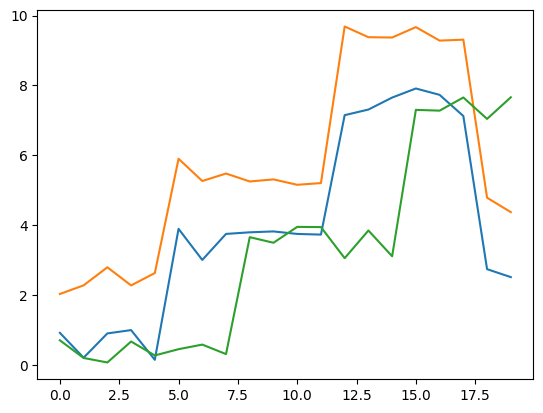

In [ ]:
np.random.seed(5464)

b = np.zeros(20)
b[5] =3
b[12] =4
b[18] = -5
b = b.cumsum()

x = np.array([i+np.random.rand() for i in b])
y = np.array([i+np.random.rand()+2 for i in b])

z = []
for i in range(20):
  if i < 3:
    v  = np.random.rand()
    z.append(v)
  else:
    v = np.random.rand()+b[i-3]
    z.append(v)
z = np.array(z)


plt.plot(x)
plt.plot(y)
plt.plot(z)

In [ ]:
np.linalg.norm(y-x, 2)

8.316898156631106

In [ ]:
np.linalg.norm(y-z,2)

15.846546157813469

In [ ]:
np.linalg.norm(x-z,2)

11.223610149966142

Cómo se puede ver, la distancia euclidea nos muestra que las dos series más cercanas son x e y (lo cual es correcto) ya que si bien arrancan de distintos valores se mueven de manera similar.

### **<font color="DeepPink">Dynamic time warping (Alineación dinámica de tiempo)   </font>**

Dynamic time warping (DTW) es una forma de comparar dos secuencias, generalmente temporales, que no están perfectamente sincronizadas. Es un método para calcular la coincidencia óptima entre dos secuencias. DTW es útil en muchos dominios, como el reconocimiento de voz, la minería de datos y los mercados financieros, entre otros. Se utiliza comúnmente en la minería de datos para medir la distancia entre dos series temporales.

A diferencia del método euclídeo, que se basa en la comparación directa de cada punto de una serie con su equivalente en otra serie diferente, el DTW busca el "punto más cercano" entre cada punto de las dos series, permitiendo así discernir formas similares que pueden estar deformadas o desfasadas.

Vamos a calcular el dtw para las series que estamos trabajando. Para hacerlo usamos la librería <code> tslearn </code>.



In [ ]:
from tslearn.metrics import dtw, dtw_path

In [ ]:
dtw(y,x)

7.866909663936795

In [ ]:
dtw(y,z)

9.196594364855162

In [ ]:
dtw(z,x)

6.805304613644793

Ahora las métricas se modificaron, todas disminuyeron porque tiene mucho más que ver con los movimientos y ahora la más cercana es la que se da entre x y z. Esto es porque simplemente estan desfasadas pero tienen los mismos niveles.

Una de las ventajas de DTW sobre DE es que la primera puede comparar series temporales que tengan diferentes tamaños o frecuencias. Además, al buscar el periodo más cercano, permite interpretar mejor los movimientos. Por ejemplo, agregemos un línea horizontal en valor 6 y camparemos.

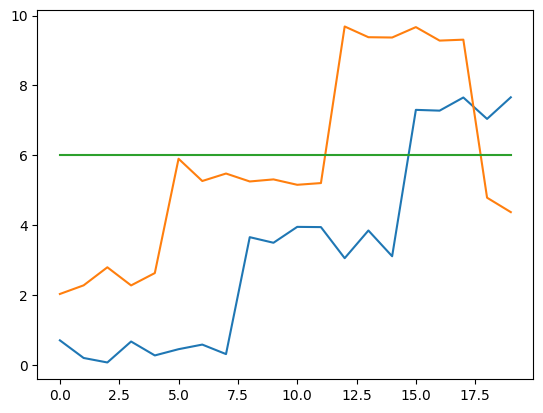

In [ ]:
m =  np.ones(20)*6

plt.plot(z)
plt.plot(y)
plt.plot(m)

Está claro que la línea horizontal nada tiene que ver con las series. Pero verifiquemos como da la DE.

In [ ]:
np.linalg.norm(y-m, 2)

12.007089915558923

In [ ]:
np.linalg.norm(y-z, 2)

15.846546157813469

Con distancia euclídea nos da que $m$ es más parecida a $y$ que $z$. En cambio, utilizemos DTW.

In [ ]:
dtw(y,m)

12.007089915558923

In [ ]:
dtw(y,z)

9.196594364855162

En este caso DTW logra interpretar el desfasaje de $z$ y la considera más similar que la línea recta.

Con la función <code> dtw_path()</code> podemos ver como son las conexiones que realiza el algoritmo para entender como empareja los puntos.

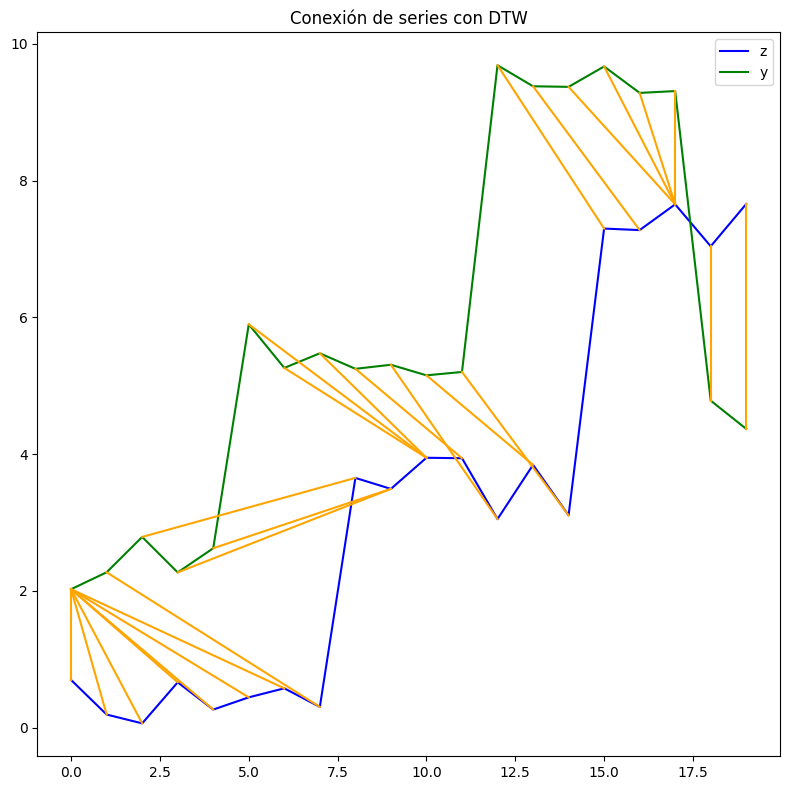

In [ ]:
optimal_path, dtw_score = dtw_path(z,y)

plt.figure(2, figsize=(8, 8))
plt.plot(z, "b-", label='z')
plt.plot(y, "g-", label='y')

# generamos una línea de conexión por cada punto del path
for positions in optimal_path:
    plt.plot([positions[0], positions[1]],
             [z[positions[0]], y[positions[1]]], color='orange')

plt.legend()
plt.title("Conexión de series con DTW")

plt.tight_layout()
plt.show()

# **<font color="DeepPink">Preparación de datos </font>**

La característica de una serie de tiempo en cuanto a manejo de datos es su índice temporal. Pandas ofrece un manejo muy práctico de los periodos de tiempo que vamos a pasar a ver.

## **<font color="DeepPink">Creando un dataframe de series temporales  </font>**

Vamos a leer el archivo y lo cargamos que tiene la cotización diaria de 50 criptomonedas durante 5 años.

Los datos muestran el día y hora de apertura y el día y hora de cierre de la cotización. El valor de apertura y valor de cierre el más bajo y alto y el volúmen que hubo en el periodo. Revisemo que clase de datos tenemos en nuestro df.

In [ ]:
url = "https://raw.githubusercontent.com/pabanib/dataframes/master/criptomonedas/criptos.csv"
criptos = pd.read_csv(url)

criptos.head()

,Unnamed: 0,OpenTime,Open,High,Low,close,Volume,CloseTime,QuoteAssetVol,NumTrades,takerbuybase,takerbuyquote,ignored,token
0,0,2019-09-18 21:00:00,21.2021,21.5998,20.7415,21.5998,2416.72,2019-09-19 20:59:59.999,51176.899183,568.0,151.22,3233.335502,0.0,BNBBUSD
1,1,2019-09-19 21:00:00,21.4918,21.5380,20.9728,21.2280,1014.81,2019-09-20 20:59:59.999,21637.032835,334.0,689.47,14745.153511,0.0,BNBBUSD
2,2,2019-09-20 21:00:00,21.3134,21.4138,20.8128,20.8755,35.59,2019-09-21 20:59:59.999,749.196112,22.0,24.60,517.207235,0.0,BNBBUSD
3,3,2019-09-21 21:00:00,20.7415,20.7415,20.0146,20.4181,198.81,2019-09-22 20:59:59.999,4059.979917,37.0,105.99,2165.878685,0.0,BNBBUSD
4,4,2019-09-22 21:00:00,20.3258,20.3258,19.2092,19.3267,804.23,2019-09-23 20:59:59.999,15831.140514,68.0,384.79,7571.610984,0.0,BNBBUSD


In [ ]:
criptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38688 entries, 0 to 38687
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     38688 non-null  int64  
 1   OpenTime       38688 non-null  object 
 2   Open           38688 non-null  float64
 3   High           38688 non-null  float64
 4   Low            38688 non-null  float64
 5   close          38688 non-null  float64
 6   Volume         38688 non-null  float64
 7   CloseTime      38688 non-null  object 
 8   QuoteAssetVol  38688 non-null  float64
 9   NumTrades      38688 non-null  float64
 10  takerbuybase   38688 non-null  float64
 11  takerbuyquote  38688 non-null  float64
 12  ignored        38688 non-null  float64
 13  token          38688 non-null  object 
dtypes: float64(10), int64(1), object(3)
memory usage: 4.1+ MB


Como se puede ver el tipo de dato de OpenTime y de CloseTime es de clase object y no es un tipo de dato manipulable como periodo de tiempo. Con la función pd.to_datetime() podemos solucionar eso.

In [ ]:
criptos['OpenTime'] = pd.to_datetime(criptos['OpenTime'])
criptos['CloseTime'] = pd.to_datetime(criptos['CloseTime'])
criptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38688 entries, 0 to 38687
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     38688 non-null  int64         
 1   OpenTime       38688 non-null  datetime64[ns]
 2   Open           38688 non-null  float64       
 3   High           38688 non-null  float64       
 4   Low            38688 non-null  float64       
 5   close          38688 non-null  float64       
 6   Volume         38688 non-null  float64       
 7   CloseTime      38688 non-null  datetime64[ns]
 8   QuoteAssetVol  38688 non-null  float64       
 9   NumTrades      38688 non-null  float64       
 10  takerbuybase   38688 non-null  float64       
 11  takerbuyquote  38688 non-null  float64       
 12  ignored        38688 non-null  float64       
 13  token          38688 non-null  object        
dtypes: datetime64[ns](2), float64(10), int64(1), object(1)
memory usage: 4

Ahora, el tipo de datos de la columna de fecha y hora es un objeto datetime64[ns]. El [ns] significa el formato de tiempo basado en nanosegundos que especifica la precisión del objeto DateTime.

Ahora podemos filtrar algun rango


In [ ]:
fecha = pd.Timestamp('2023-06-05')

criptos[criptos.OpenTime > fecha]

,Unnamed: 0,OpenTime,Open,High,Low,close,Volume,CloseTime,QuoteAssetVol,NumTrades,takerbuybase,takerbuyquote,ignored,token
1356,1356,2023-06-05 21:00:00,277.20000,285.90000,273.40000,281.40000,1.206340e+05,2023-06-06 20:59:59.999,3.366807e+07,72778.0,6.225972e+04,1.737041e+07,0.0,BNBBUSD
1357,1357,2023-06-06 21:00:00,281.40000,281.90000,253.80000,259.30000,2.359172e+05,2023-06-07 20:59:59.999,6.243978e+07,119451.0,1.122475e+05,2.966093e+07,0.0,BNBBUSD
1358,1358,2023-06-07 21:00:00,259.30000,267.50000,257.30000,262.00000,1.327854e+05,2023-06-08 20:59:59.999,3.490555e+07,66772.0,6.813996e+04,1.791093e+07,0.0,BNBBUSD
1359,1359,2023-06-08 21:00:00,262.00000,264.40000,255.70000,260.70000,1.130031e+05,2023-06-09 20:59:59.999,2.945904e+07,63349.0,5.792024e+04,1.510062e+07,0.0,BNBBUSD
1360,1360,2023-06-09 21:00:00,260.70000,260.80000,226.90000,239.00000,2.638455e+05,2023-06-10 20:59:59.999,6.349402e+07,168891.0,1.269839e+05,3.054925e+07,0.0,BNBBUSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38683,170,2023-07-27 21:00:00,0.01415,0.01483,0.01403,0.01453,4.027721e+07,2023-07-28 20:59:59.999,5.804565e+05,2658.0,1.999484e+07,2.885757e+05,0.0,GFTBUSD
38684,171,2023-07-28 21:00:00,0.01447,0.01460,0.01421,0.01442,2.084694e+07,2023-07-29 20:59:59.999,2.994464e+05,1363.0,9.557755e+06,1.373793e+05,0.0,GFTBUSD
38685,172,2023-07-29 21:00:00,0.01446,0.01588,0.01430,0.01472,1.138499e+08,2023-07-30 20:59:59.999,1.715826e+06,8135.0,5.485524e+07,8.270355e+05,0.0,GFTBUSD
38686,173,2023-07-30 21:00:00,0.01471,0.01498,0.01408,0.01425,3.084668e+07,2023-07-31 20:59:59.999,4.439183e+05,2128.0,1.257241e+07,1.812039e+05,0.0,GFTBUSD



Si queremos ver la corización del un día en particular en los datos como estan vamos a tener un problema.

In [ ]:
criptos[criptos.OpenTime == fecha]

,Unnamed: 0,OpenTime,Open,High,Low,close,Volume,CloseTime,QuoteAssetVol,NumTrades,takerbuybase,takerbuyquote,ignored,token


No nos trae nada porque hay que agregarle también la hora que es como tenemos los datos. Pero si queremos trabajar con el día tenemos que acceder a cada elemento y llamar al metodo date()

In [ ]:
dias = criptos.OpenTime.apply(lambda x: x.date())
criptos[dias == fecha.date()].head()

,Unnamed: 0,OpenTime,Open,High,Low,close,Volume,CloseTime,QuoteAssetVol,NumTrades,takerbuybase,takerbuyquote,ignored,token
1356,1356,2023-06-05 21:00:00,277.2000,285.9000,273.400,281.4000,1.206340e+05,2023-06-06 20:59:59.999,3.366807e+07,72778.0,6.225972e+04,1.737041e+07,0.0,BNBBUSD
2769,1356,2023-06-05 21:00:00,25745.7600,27369.2700,25363.780,27242.7300,9.409716e+03,2023-06-06 20:59:59.999,2.473039e+08,197772.0,4.746337e+03,1.246950e+08,0.0,BTCBUSD
4150,1324,2023-06-05 21:00:00,0.5094,0.5329,0.496,0.5302,6.095748e+07,2023-06-06 20:59:59.999,3.122512e+07,84560.0,3.084989e+07,1.580342e+07,0.0,XRPBUSD
5531,1324,2023-06-05 21:00:00,1811.9000,1898.8900,1798.400,1885.2900,7.670288e+04,2023-06-06 20:59:59.999,1.418782e+08,161070.0,4.095159e+04,7.575229e+07,0.0,ETHBUSD
6912,1324,2023-06-05 21:00:00,87.7500,91.5000,85.740,90.9400,1.676547e+05,2023-06-06 20:59:59.999,1.482106e+07,39497.0,8.056920e+04,7.129651e+06,0.0,LTCBUSD


## **<font color="DeepPink">Índice temporal </font>**

Para mejorar los filtros y la forma de trabajar es mejor tener un índice temporal ya que nos va permitir acceder a los métodos de los objetos datatime más fácil.

In [ ]:
criptos.set_index('OpenTime', inplace = True)
criptos[criptos.index.date ==  fecha.date()].head()

,Unnamed: 0,Open,High,Low,close,Volume,CloseTime,QuoteAssetVol,NumTrades,takerbuybase,takerbuyquote,ignored,token
OpenTime,,,,,,,,,,,,,
2023-06-05 21:00:00,1356,277.2000,285.9000,273.400,281.4000,1.206340e+05,2023-06-06 20:59:59.999,3.366807e+07,72778.0,6.225972e+04,1.737041e+07,0.0,BNBBUSD
2023-06-05 21:00:00,1356,25745.7600,27369.2700,25363.780,27242.7300,9.409716e+03,2023-06-06 20:59:59.999,2.473039e+08,197772.0,4.746337e+03,1.246950e+08,0.0,BTCBUSD
2023-06-05 21:00:00,1324,0.5094,0.5329,0.496,0.5302,6.095748e+07,2023-06-06 20:59:59.999,3.122512e+07,84560.0,3.084989e+07,1.580342e+07,0.0,XRPBUSD
2023-06-05 21:00:00,1324,1811.9000,1898.8900,1798.400,1885.2900,7.670288e+04,2023-06-06 20:59:59.999,1.418782e+08,161070.0,4.095159e+04,7.575229e+07,0.0,ETHBUSD
2023-06-05 21:00:00,1324,87.7500,91.5000,85.740,90.9400,1.676547e+05,2023-06-06 20:59:59.999,1.482106e+07,39497.0,8.056920e+04,7.129651e+06,0.0,LTCBUSD


In [ ]:
criptos.loc['2023-07-02'].head()

,Unnamed: 0,Open,High,Low,close,Volume,CloseTime,QuoteAssetVol,NumTrades,takerbuybase,takerbuyquote,ignored,token
OpenTime,,,,,,,,,,,,,
2023-07-02 21:00:00,1383,246.4000,254.7000,245.3000,246.500,1.639095e+05,2023-07-03 20:59:59.999,4.074616e+07,68579.0,8.325255e+04,2.069143e+07,0.0,BNBBUSD
2023-07-02 21:00:00,1383,30616.3500,31379.9800,30571.0000,31158.570,4.374341e+03,2023-07-03 20:59:59.999,1.353782e+08,101357.0,2.206824e+03,6.829721e+07,0.0,BTCBUSD
2023-07-02 21:00:00,1351,0.4844,0.4914,0.4784,0.489,4.132341e+07,2023-07-03 20:59:59.999,1.999849e+07,42983.0,2.034893e+07,9.844753e+06,0.0,XRPBUSD
2023-07-02 21:00:00,1351,1937.5300,1976.1200,1933.4100,1955.520,5.731599e+04,2023-07-03 20:59:59.999,1.123298e+08,85238.0,2.827196e+04,5.540185e+07,0.0,ETHBUSD
2023-07-02 21:00:00,1351,113.5800,114.9300,105.5800,107.290,2.871692e+05,2023-07-03 20:59:59.999,3.161696e+07,60146.0,1.334125e+05,1.469660e+07,0.0,LTCBUSD


Podemos seleccionar fechas escribiendolas en formato texto y pandas lo interpreta

In [ ]:
criptos.loc['Apr 2023']

,Unnamed: 0,Open,High,Low,close,Volume,CloseTime,QuoteAssetVol,NumTrades,takerbuybase,takerbuyquote,ignored,token
OpenTime,,,,,,,,,,,,,
2023-04-01 21:00:00,1291,315.10000,316.40000,310.90000,313.90000,2.683678e+04,2023-04-02 20:59:59.999,8.423859e+06,38806.0,1.287434e+04,4.042494e+06,0.0,BNBBUSD
2023-04-02 21:00:00,1292,314.00000,314.30000,300.00000,308.80000,9.913282e+04,2023-04-03 20:59:59.999,3.051721e+07,92454.0,4.767690e+04,1.468821e+07,0.0,BNBBUSD
2023-04-03 21:00:00,1293,308.80000,312.70000,308.30000,311.00000,5.753014e+04,2023-04-04 20:59:59.999,1.787313e+07,54656.0,2.835088e+04,8.809223e+06,0.0,BNBBUSD
2023-04-04 21:00:00,1294,311.00000,317.00000,310.40000,314.10000,6.547119e+04,2023-04-05 20:59:59.999,2.056091e+07,58024.0,3.521667e+04,1.106442e+07,0.0,BNBBUSD
2023-04-05 21:00:00,1295,314.20000,315.30000,310.80000,312.30000,4.250465e+04,2023-04-06 20:59:59.999,1.329472e+07,50673.0,2.105807e+04,6.588129e+06,0.0,BNBBUSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-26 21:00:00,78,0.03675,0.03829,0.03632,0.03748,5.500924e+07,2023-04-27 20:59:59.999,2.052402e+06,7674.0,2.616640e+07,9.773857e+05,0.0,GFTBUSD
2023-04-27 21:00:00,79,0.03748,0.03754,0.03583,0.03652,3.975024e+07,2023-04-28 20:59:59.999,1.456276e+06,5808.0,1.737788e+07,6.370968e+05,0.0,GFTBUSD
2023-04-28 21:00:00,80,0.03653,0.03776,0.03626,0.03675,3.941195e+07,2023-04-29 20:59:59.999,1.455433e+06,5927.0,1.966677e+07,7.260388e+05,0.0,GFTBUSD


También podemos elefir rangos de fecha utilizando los dos puntos ":" de la siguiente forma

In [ ]:
criptos.loc['2023-05-01':'2023-05-03']

<ipython-input-54-b7575ac9a37b>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  criptos.loc['2023-05-01':'2023-05-03']


,Unnamed: 0,Open,High,Low,close,Volume,CloseTime,QuoteAssetVol,NumTrades,takerbuybase,takerbuyquote,ignored,token
OpenTime,,,,,,,,,,,,,
2023-05-01 21:00:00,1321,328.80000,328.80000,321.50000,321.70000,6.591334e+04,2023-05-02 20:59:59.999,2.138657e+07,53771.0,3.493434e+04,1.133506e+07,0.0,BNBBUSD
2023-05-02 21:00:00,1322,321.70000,327.60000,320.50000,325.90000,6.709872e+04,2023-05-03 20:59:59.999,2.172218e+07,59091.0,3.476436e+04,1.125467e+07,0.0,BNBBUSD
2023-05-03 21:00:00,1323,325.90000,327.50000,323.30000,323.80000,2.976016e+04,2023-05-04 20:59:59.999,9.685659e+06,32763.0,1.669394e+04,5.434021e+06,0.0,BNBBUSD
2023-05-01 21:00:00,1321,28088.56000,28888.00000,27888.00000,28684.23000,9.211732e+03,2023-05-02 20:59:59.999,2.612425e+08,220017.0,4.509840e+03,1.278683e+08,0.0,BTCBUSD
2023-05-02 21:00:00,1322,28684.24000,29264.30000,28113.64000,29023.22000,1.155327e+04,2023-05-03 20:59:59.999,3.299873e+08,282442.0,5.806073e+03,1.658313e+08,0.0,BTCBUSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02 21:00:00,142,1.12660,1.15180,1.05180,1.14010,1.300596e+06,2023-05-03 20:59:59.999,1.423757e+06,8066.0,6.053638e+05,6.629779e+05,0.0,MAGICBUSD
2023-05-03 21:00:00,143,1.14140,1.14270,1.09080,1.09340,8.385368e+05,2023-05-04 20:59:59.999,9.347811e+05,6113.0,3.872080e+05,4.319900e+05,0.0,MAGICBUSD
2023-05-01 21:00:00,83,0.03485,0.03600,0.03374,0.03421,4.383240e+07,2023-05-02 20:59:59.999,1.505130e+06,6527.0,2.033466e+07,6.988201e+05,0.0,GFTBUSD


## **<font color="DeepPink"> Agrupar datos de series temporales  </font>**

Para agrupar datos de acurerdo a los periodos de tiempo que seleccionemos podemos hacerlo con el método <code>resample()</code>.

In [ ]:
criptos.resample('M')['Open','close'].mean()

,Open,close
OpenTime,,
2019-09-30,4533.556415,4477.097181
2019-10-31,2391.644417,2400.760727
2019-11-30,1347.921212,1338.151472
2019-12-31,1062.679248,1061.424653
2020-01-31,1078.777152,1088.095510
2020-02-29,1148.219852,1144.967844
2020-03-31,788.698387,781.595696
2020-04-30,766.298738,774.021453
2020-05-31,920.594925,925.021081


También lo podemos juntar con el método groupby() para tener dos niveles de agrupamiento.

In [ ]:
criptos.groupby('token').resample('y')['Open'].mean()

token    OpenTime  
ACHBUSD  2022-12-31    0.022410
         2023-12-31    0.024756
ADABUSD  2019-12-31    0.036133
         2020-12-31    0.086777
         2021-12-31    1.499534
                         ...   
XRPBUSD  2019-12-31    0.242547
         2020-12-31    0.258261
         2021-12-31    0.867418
         2022-12-31    0.512519
         2023-12-31    0.468311
Name: Open, Length: 156, dtype: float64


# **<font color="DeepPink"> Clustering de series temporales </font>**

El agrupamiento o clustering de las series temporales tiene la particularidad que nos va interesar agrupar a las series de acuerdo a su forma. La consigna de agrupamiento es la misma que para los demás datos lo que va variar es la función de disimilitud que vamos a utiliar.

La primera forma que podemos evaluar para agrupar es usando la distancia euclídea en la comparación periodo a periodo. Esto se hace considerando a cada periodo como si fuera una característica.

Veamos como lo trabajamos con los datos de las criptomonedas que tenemos. Lo primero que vamos a hacer es convertir el dataframe en un panel que considere token y periodo de tiempo

In [ ]:
#copiamos el dataframe para no modificar el original
crip = criptos.copy()

# Convertimos el índice en un multi índice que considera el token y el periodo de tiempo original
crip = crip.set_index(['token',crip.index])

# Generamos una serie con multi índice solo con el valor de apertura
crip = crip.Open

crip

token    OpenTime           
BNBBUSD  2019-09-18 21:00:00    21.20210
         2019-09-19 21:00:00    21.49180
         2019-09-20 21:00:00    21.31340
         2019-09-21 21:00:00    20.74150
         2019-09-22 21:00:00    20.32580
                                  ...   
GFTBUSD  2023-07-27 21:00:00     0.01415
         2023-07-28 21:00:00     0.01447
         2023-07-29 21:00:00     0.01446
         2023-07-30 21:00:00     0.01471
         2023-07-31 21:00:00     0.01424
Name: Open, Length: 38688, dtype: float64

Ya habíamos visto que las series no tenían la misma longitud entre las distintas criptomonedas por lo tanto esto va ser un problema a la hora de agrupar. Una forma de solucionarlo puede ser poniendo valor en 0 a todos los periodos iniciales.

In [ ]:
# Con el método unstack() convertimos los periodos en columnas, cuando no tenga valor en el periodo le va poner valor nulo
crip = crip.unstack()
crip

OpenTime,2019-09-18 21:00:00,2019-09-19 21:00:00,2019-09-20 21:00:00,2019-09-21 21:00:00,2019-09-22 21:00:00,2019-09-23 21:00:00,2019-09-24 21:00:00,2019-09-25 21:00:00,2019-09-26 21:00:00,2019-09-27 21:00:00,...,2023-07-22 21:00:00,2023-07-23 21:00:00,2023-07-24 21:00:00,2023-07-25 21:00:00,2023-07-26 21:00:00,2023-07-27 21:00:00,2023-07-28 21:00:00,2023-07-29 21:00:00,2023-07-30 21:00:00,2023-07-31 21:00:00
token,,,,,,,,,,,,,,,,,,,,,
ACHBUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.017920,0.018560,0.017460,0.017620,0.018060,0.018070,0.018290,0.018380,0.018070,0.018310
ADABUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.310000,0.317000,0.305300,0.303700,0.306800,0.307700,0.309900,0.313000,0.315600,0.307200
AGIXBUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.229530,0.234500,0.220900,0.217910,0.220520,0.224140,0.221700,0.223940,0.217800,0.223370
ANCBUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APEBUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.070000,2.095000,2.033000,1.991000,1.992000,1.972000,1.969000,1.973000,1.900000,1.859000
APTBUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.667200,7.570300,7.051000,6.971500,7.018600,7.069500,7.067800,7.138900,7.017300,7.028000
ATOMBUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.265000,9.279000,9.001000,8.956000,8.973000,8.912000,9.028000,9.071000,9.003000,8.859000
AVAXBUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.520000,13.540000,13.110000,13.340000,13.260000,13.150000,13.220000,13.240000,13.120000,12.810000
BNBBUSD,21.2021,21.4918,21.3134,20.7415,20.3258,19.3636,16.0987,15.8828,15.0161,15.6415,...,241.100000,242.400000,239.000000,237.800000,238.900000,240.600000,241.900000,242.500000,242.500000,240.900000


In [ ]:
# Rellenamos los valores nulos con 0
crip = crip.fillna(0)


Ahora para poder agrupar tenemos que recurrir a la regla básica de clustering que es escalar los valores.

Para la forma que vamos a trabajar la serie temporal, no podemos aplicar el escalado directamente como lo hacemos con un df común que veniamos trabajando.
El escalado en estos casos lo vamos a tener que hacer a cada serie temporal.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#aplicamos el escalador al df traspuesto,  ya que siempre se aplica sobre la columna.

X = scaler.fit_transform(crip.T)

#convertimos la matriz en un dataframe par consultarla mejor

X = pd.DataFrame(X.T, columns = crip.columns, index = crip.index)
X

OpenTime,2019-09-18 21:00:00,2019-09-19 21:00:00,2019-09-20 21:00:00,2019-09-21 21:00:00,2019-09-22 21:00:00,2019-09-23 21:00:00,2019-09-24 21:00:00,2019-09-25 21:00:00,2019-09-26 21:00:00,2019-09-27 21:00:00,...,2023-07-22 21:00:00,2023-07-23 21:00:00,2023-07-24 21:00:00,2023-07-25 21:00:00,2023-07-26 21:00:00,2023-07-27 21:00:00,2023-07-28 21:00:00,2023-07-29 21:00:00,2023-07-30 21:00:00,2023-07-31 21:00:00
token,,,,,,,,,,,,,,,,,,,,,
ACHBUSD,-0.659243,-0.659243,-0.659243,-0.659243,-0.659243,-0.659243,-0.659243,-0.659243,-0.659243,-0.659243,...,0.600731,0.645730,0.568388,0.579638,0.610574,0.611278,0.626746,0.633074,0.611278,0.628152
ADABUSD,-0.953865,-0.953865,-0.953865,-0.953865,-0.953865,-0.953865,-0.953865,-0.953865,-0.953865,-0.953865,...,-0.483806,-0.473192,-0.490933,-0.493359,-0.488658,-0.487294,-0.483958,-0.479257,-0.475315,-0.488052
AGIXBUSD,-0.413901,-0.413901,-0.413901,-0.413901,-0.413901,-0.413901,-0.413901,-0.413901,-0.413901,-0.413901,...,1.560717,1.603473,1.486474,1.460751,1.483205,1.514347,1.493356,1.512627,1.459805,1.507723
ANCBUSD,-0.296946,-0.296946,-0.296946,-0.296946,-0.296946,-0.296946,-0.296946,-0.296946,-0.296946,-0.296946,...,-0.296946,-0.296946,-0.296946,-0.296946,-0.296946,-0.296946,-0.296946,-0.296946,-0.296946,-0.296946
APEBUSD,-0.595976,-0.595976,-0.595976,-0.595976,-0.595976,-0.595976,-0.595976,-0.595976,-0.595976,-0.595976,...,0.039151,0.046822,0.027798,0.014912,0.015219,0.009082,0.008162,0.009389,-0.013009,-0.025589
APTBUSD,-0.458882,-0.458882,-0.458882,-0.458882,-0.458882,-0.458882,-0.458882,-0.458882,-0.458882,-0.458882,...,1.516243,1.491281,1.357505,1.337026,1.349159,1.362271,1.361833,1.380149,1.348824,1.351580
ATOMBUSD,-1.230088,-1.230088,-1.230088,-1.230088,-1.230088,-1.230088,-1.230088,-1.230088,-1.230088,-1.230088,...,-0.318076,-0.316698,-0.344064,-0.348493,-0.346820,-0.352824,-0.341406,-0.337173,-0.343867,-0.358041
AVAXBUSD,-0.824455,-0.824455,-0.824455,-0.824455,-0.824455,-0.824455,-0.824455,-0.824455,-0.824455,-0.824455,...,-0.358999,-0.358311,-0.373115,-0.365196,-0.367951,-0.371738,-0.369328,-0.368639,-0.372770,-0.383443
BNBBUSD,-1.177281,-1.175664,-1.176659,-1.179852,-1.182173,-1.187545,-1.205772,-1.206977,-1.211816,-1.208324,...,0.050354,0.057611,0.038630,0.031931,0.038072,0.047562,0.054820,0.058169,0.058169,0.049237


<Axes: xlabel='OpenTime'>

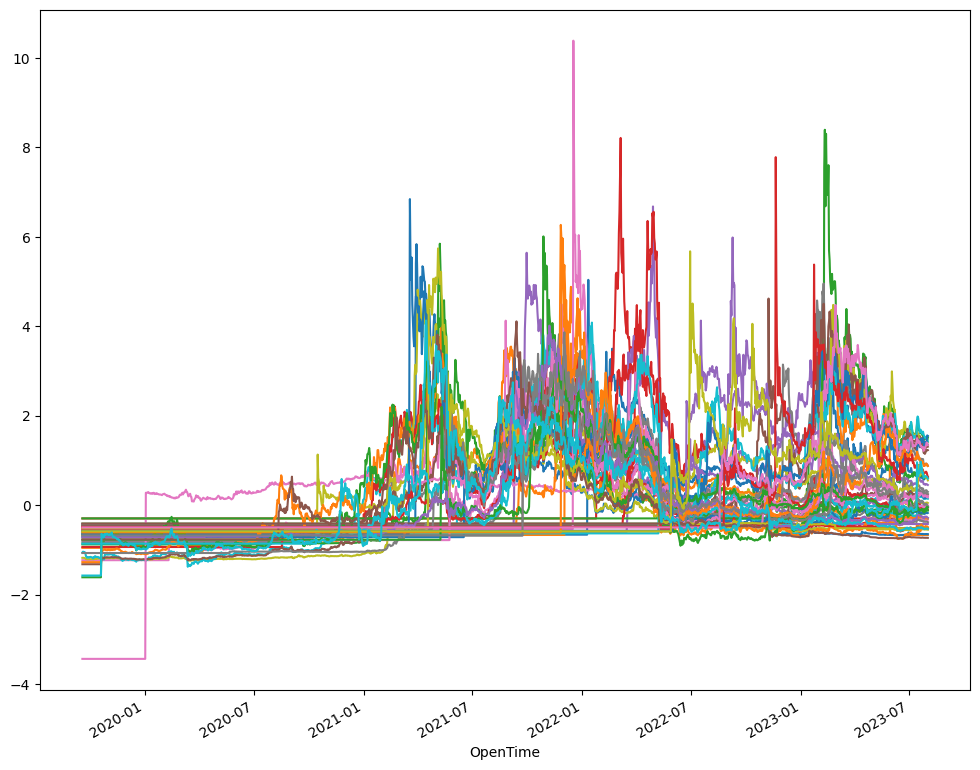

In [ ]:
X.T.plot( figsize = (12,10), legend = False)

Ahora con este formato de datos podemos aplicar clustering y revisar cuales se parecen con las metodologías ya habituales conocidas

In [ ]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

inercias = []
for i in range(2,10):
  km = KMeans(i)
  km.fit(X)
  inercias.append(km.inertia_)



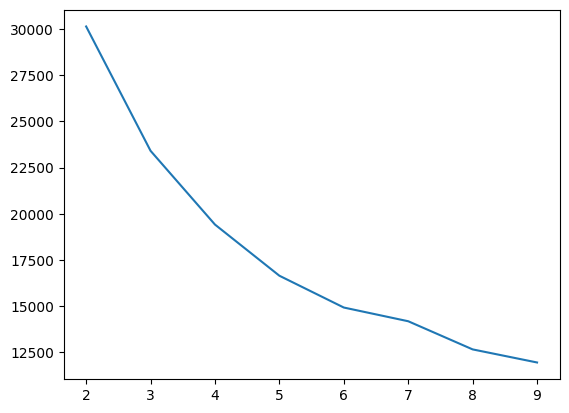

In [ ]:
plt.plot(range(2,10), inercias)

Elegimos 5 grupos que parece tener un quiebre en la inercia y vemos como queda.

In [ ]:
#cambiamos la cantidad de grupos con el método set_params()
km.set_params(n_clusters =  5)
#volvemos a ajustar el modelos
km.fit(X)


KMeans(n_clusters=5)

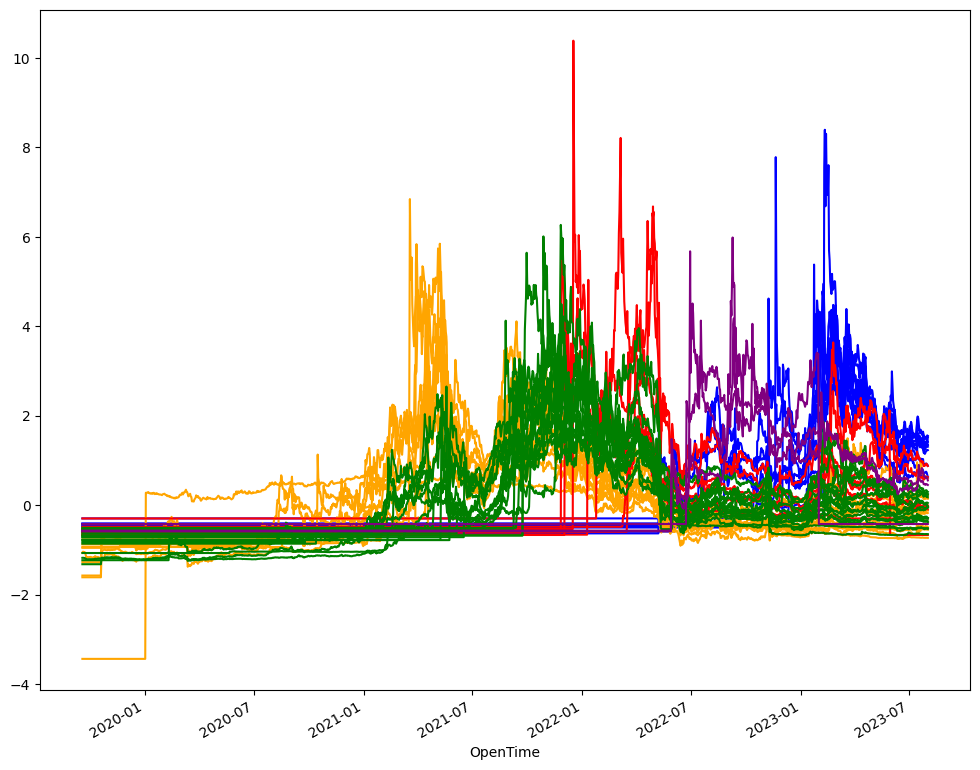

In [ ]:
colores = ['blue','orange','red','green','purple']

def graf(X,km,colores = colores):
  fig, ax = plt.subplots()

  for l in np.unique(km.labels_):
    df = X[km.labels_ == l]
    df.T.plot(figsize = (12,10), legend = False, color = colores[l], ax = ax)
graf(X, km, colores)

Para eliminar un poco el ruido podriamos ver como se agrupan con la media movil que lo que hace es calcular el promedio cada cierto periodo

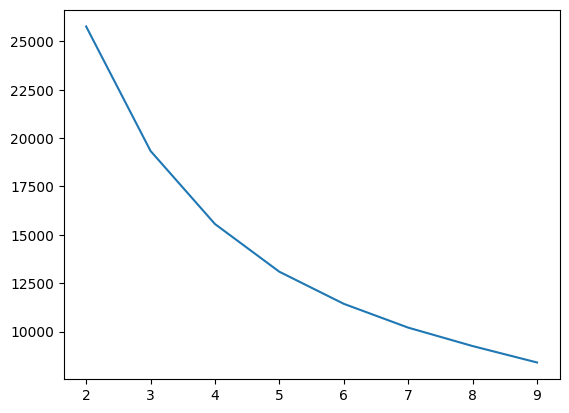

In [ ]:
#aplicamos  la media movil cada 30 días y eliminamos los valores nulos
X = X.rolling(30,axis = 1).mean().dropna(axis = 1)

#revisamos la cantidad de grupos que mejor se adapta
inercias = []
for i in range(2,10):
  km = KMeans(i)
  km.fit(X)
  inercias.append(km.inertia_)
plt.plot(range(2,10), inercias)

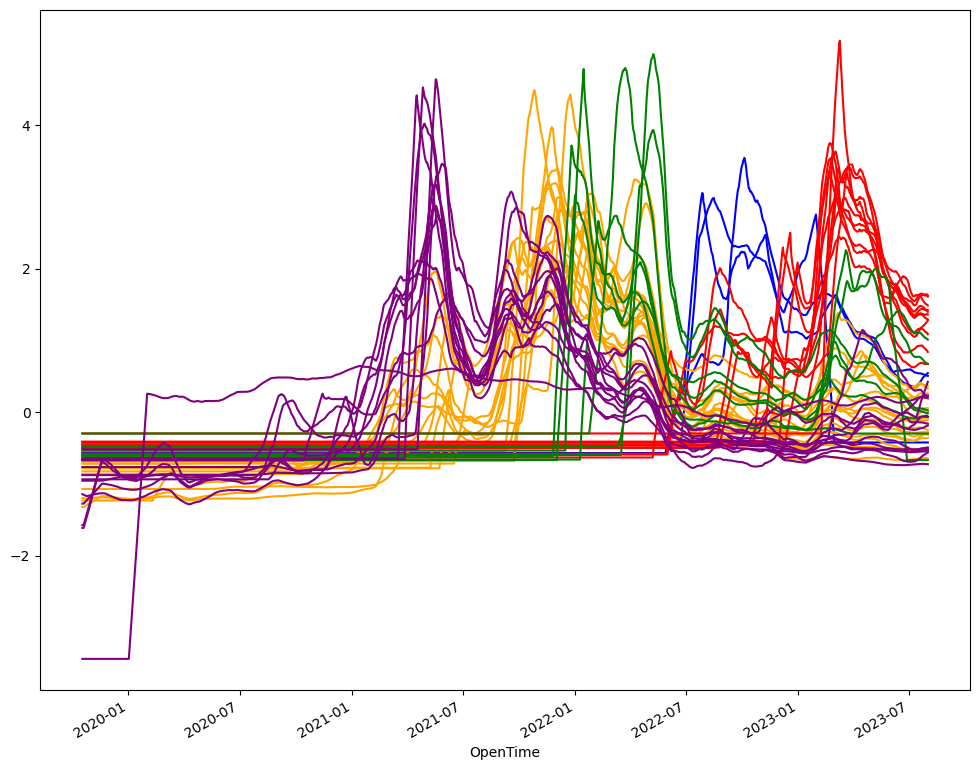

In [ ]:
#cambiamos la cantidad de grupos con el método set_params()
km.set_params(n_clusters =  5)
#volvemos a ajustar el modelos
km.fit(X)

graf(X, km, colores)

A todas las que arrancaban en periodos en 0 porque no teníamso los datos el algoritmo las va tender a emparejar ya que son muchos periodos que se comportan igual. Probemos ahora que todas arranquen en el mismo periodo

<Axes: xlabel='OpenTime'>

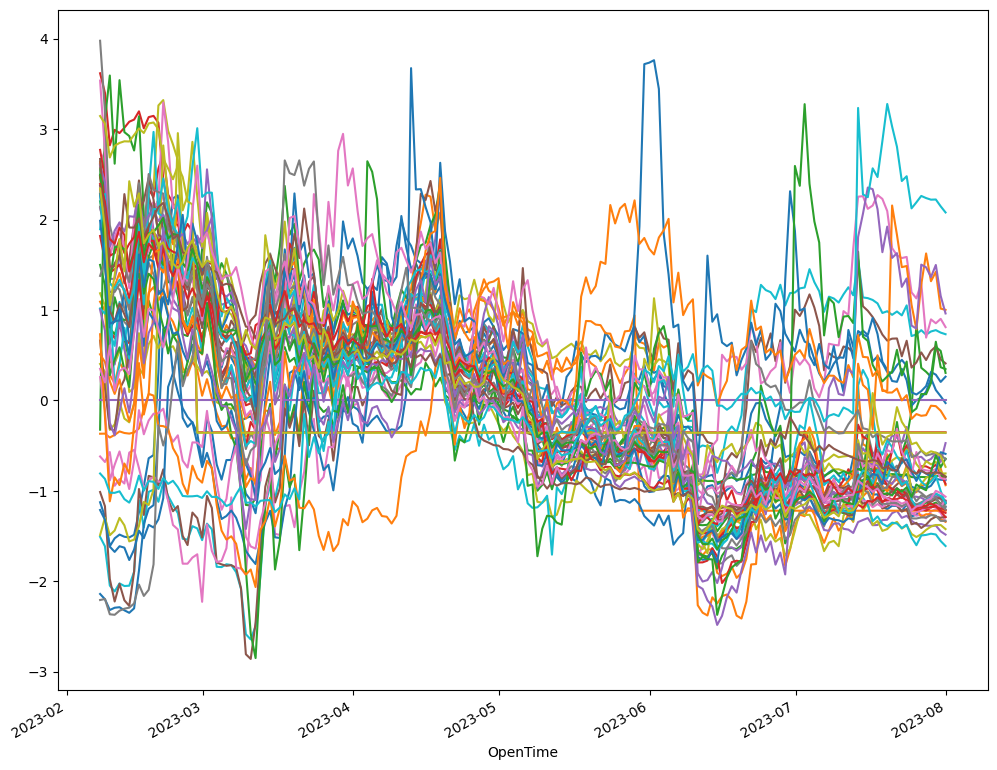

In [ ]:
# Obtenemos las fechas mínimas de cada token
fechas = criptos.reset_index().groupby('token').min()['OpenTime']
# Obtenemos la fecha mínima en la que todos arrancan, la máxima del listado
fecha = fechas.max()

crip_fecha = crip.loc[:,fecha:]

X = pd.DataFrame(scaler.fit_transform(crip_fecha.T).T,columns = crip_fecha.columns, index = crip_fecha.index)

X.T.plot(figsize = (12,10), legend = False)

<Axes: xlabel='OpenTime'>

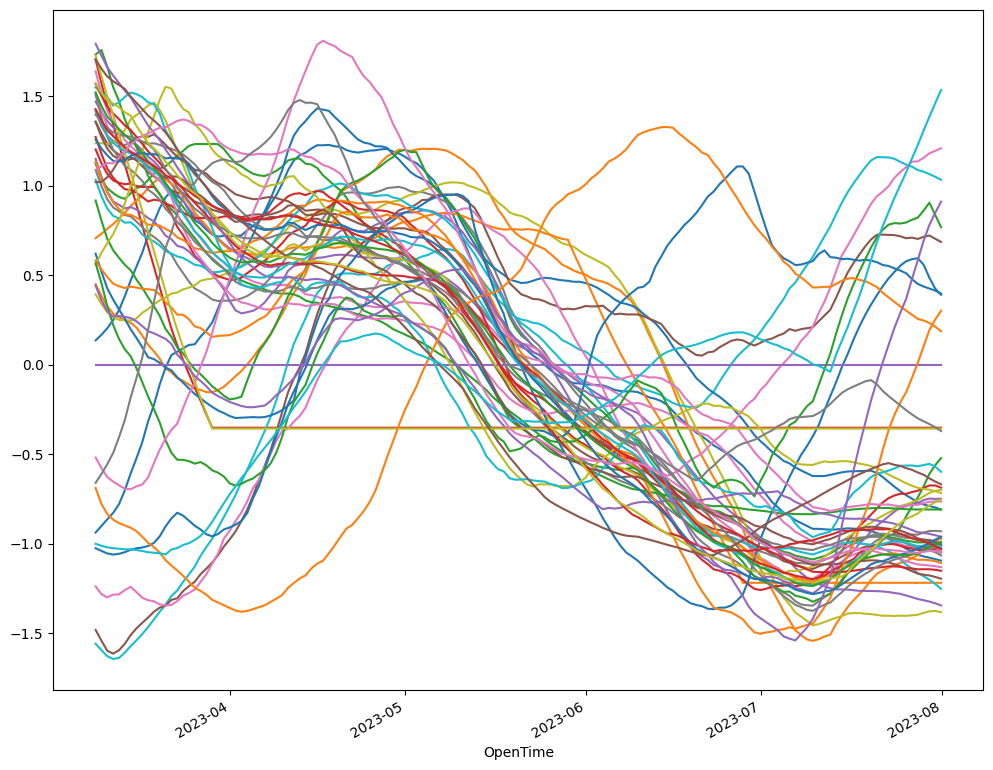

In [ ]:
X.rolling(30,axis = 1).mean().T.plot(figsize = (12,10), legend = False)

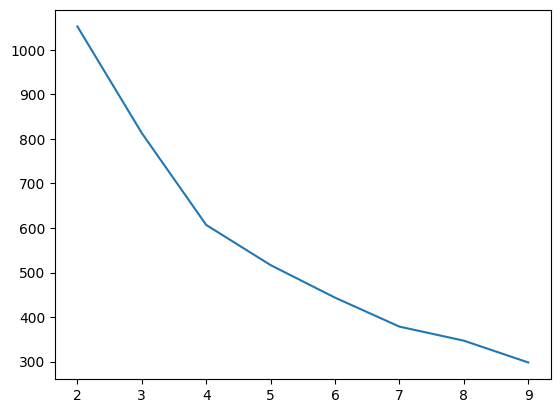

In [ ]:
X = X.rolling(30,axis = 1).mean().dropna(axis = 1)

#revisamos la cantidad de grupos que mejor se adapta
inercias = []
for i in range(2,10):
  km = KMeans(i)
  km.fit(X)
  inercias.append(km.inertia_)
plt.plot(range(2,10), inercias)

En este caso elegimos 4 grupos que se nota claramente el quiebre en la inercia

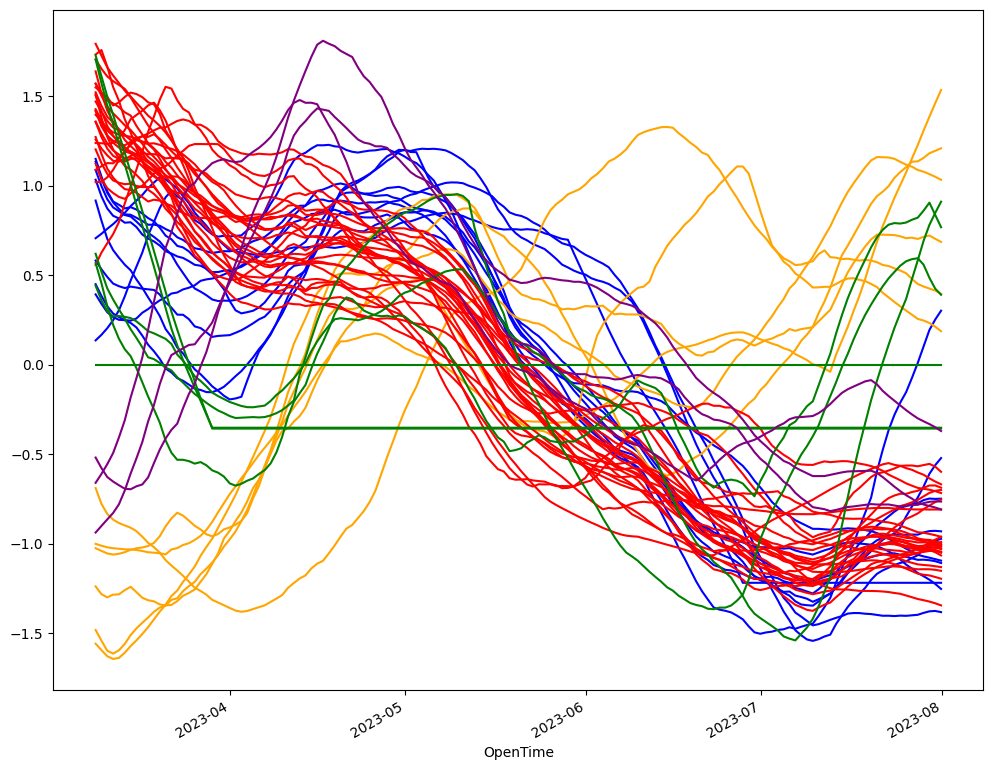

In [ ]:
#cambiamos la cantidad de grupos con el método set_params()
km.set_params(n_clusters =  5)
#volvemos a ajustar el modelos
km.fit(X)

graf(X, km, colores)

# **<font color="DeepPink">Agrupamos con DTW   </font>**

El clustering con DTW adopta más ventajas. La primera es que no es necesario emparejar los periodos para poder hacerlo, si no que lo hacemos con la info que tengamos. Segundo que permite tener una métrica mejor de que tan diferentes son las series entre sí, ya que no solo revisa periodo a periodo si no que tiene en cuenta los rezagos.

Esta métrica no esta en scikit learn por eso tenemos que usar la librería tslearn que es una de las que se adapta a scikit learn y tiene la opción de este tipo de grupo.

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series, to_time_series_dataset

Con las funciones to_time_series() y to_time_series_dataset() podemos armar el dataset para trabajar con las series de diferentes tamaños como las que tenemos

La función to_time_series() convierte la serie de pandas, array o lista en un array de 2 dimensiones. Es similar a lo que haríamos con .reshape(-1,1)

In [ ]:
to_time_series(criptos.query("token == 'BNBBUSD'")['Open'])

array([[ 21.2021],
       [ 21.4918],
       [ 21.3134],
       ...,
       [242.5   ],
       [242.5   ],
       [240.9   ]])

La función to_time_series_dataset() va convertir una lista de series en un dataset, sin importar cual fuera el largo de la serie, los periodos faltantes se van a completar con NaN.

In [ ]:
series = []
#iteramos por cada token
for t in criptos.token.unique():
  # filtramos los datos de cada token y lo convertimos en serie
  s = to_time_series(criptos.query("token == '{}'".format(t))['Open'])
  #damos vuelta la serie porque completa con nan los últimos valores
  s = s[::-1]
  series.append(s)

# Convertimos la lista de series en un dataset
series_ds = to_time_series_dataset(series)
series_ds

array([[[2.409000e+02],
        [2.425000e+02],
        [2.425000e+02],
        ...,
        [2.131340e+01],
        [2.149180e+01],
        [2.120210e+01]],

       [[2.923402e+04],
        [2.928138e+04],
        [2.935511e+04],
        ...,
        [1.016944e+04],
        [1.021431e+04],
        [9.881430e+03]],

       [[6.976000e-01],
        [7.045000e-01],
        [7.122000e-01],
        ...,
        [         nan],
        [         nan],
        [         nan]],

       ...,

       [[9.347000e-01],
        [9.341000e-01],
        [9.653000e-01],
        ...,
        [         nan],
        [         nan],
        [         nan]],

       [[7.428000e-01],
        [7.539000e-01],
        [7.550000e-01],
        ...,
        [         nan],
        [         nan],
        [         nan]],

       [[1.424000e-02],
        [1.471000e-02],
        [1.446000e-02],
        ...,
        [         nan],
        [         nan],
        [         nan]]])

Con el dataset podemos escalar los valores usando el método propio de tslearn

In [ ]:
series_ds_escalada =TimeSeriesScalerMeanVariance().fit_transform(series_ds)


In [ ]:
tskm = TimeSeriesKMeans(5, metric = 'dtw')

tskm.fit(series_ds_escalada)

TimeSeriesKMeans(metric='dtw', n_clusters=5)

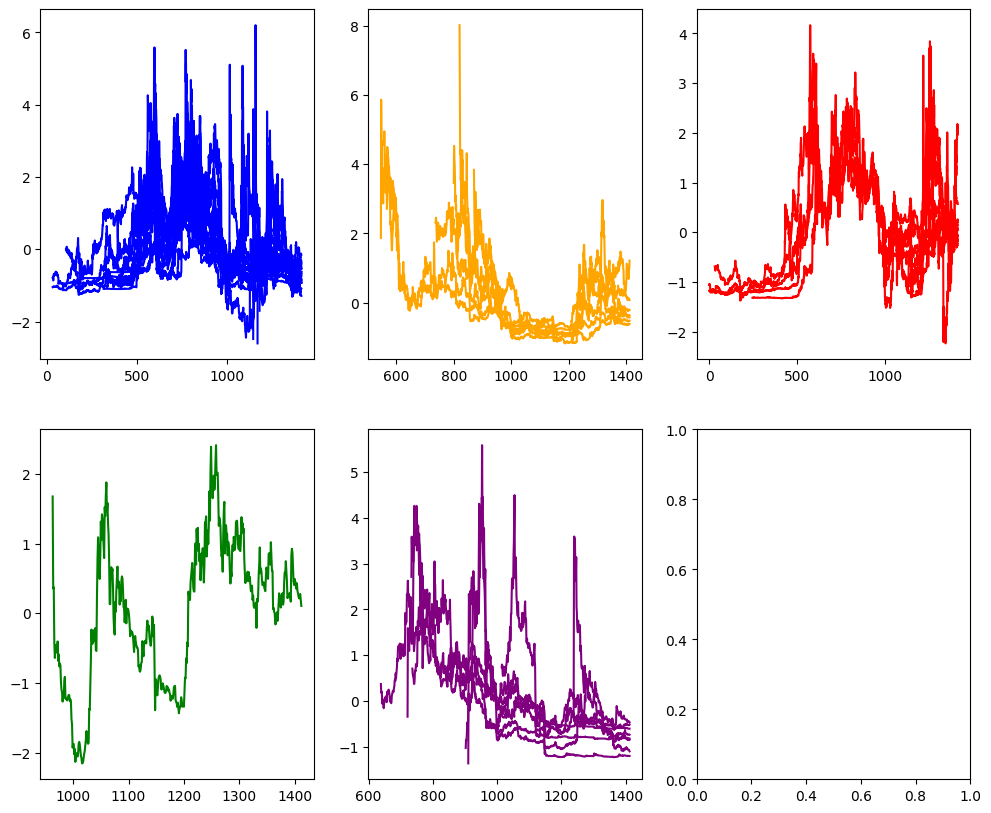

In [ ]:
# Crear una figura con 2 filas y 3 columnas de subtramas
fig, ax = plt.subplots(2, 3, figsize=(12, 10))

# Crear un rango de valores para los puntos en las series de tiempo
rango = np.array(list(range(len(series_ds_escalada[0]))))

# Iterar a través de las etiquetas de clústeres únicas
for c in np.unique(tskm.labels_):
    # Iterar a través de las series de tiempo dentro del clúster actual
    for s in series_ds_escalada[tskm.labels_ == c]:
        # Invertir la serie de tiempo
        ss = s[::-1]

        # Filtrar valores no nulos en la serie de tiempo invertida
        filtro = (np.isnan(ss) == False).reshape(-1,)

        # Determinar la fila (i) y la columna (c-i*3) de la subtrama actual
        i = 0 if c < 3 else 1

        # Graficar la serie de tiempo invertida y filtrada en la subtrama correspondiente
        ax[i, (c - i * 3)].plot(rango[filtro], ss[filtro], color=colores[c])


Si queremos recuperar cuales son las criptomonedas que pertenecen a cada grupo podemos volver al dataframe original y pasarle las clases.

In [ ]:
crip['grupos'] = tskm.labels_

crip.query("grupos == 0")

OpenTime,2019-09-18 21:00:00,2019-09-19 21:00:00,2019-09-20 21:00:00,2019-09-21 21:00:00,2019-09-22 21:00:00,2019-09-23 21:00:00,2019-09-24 21:00:00,2019-09-25 21:00:00,2019-09-26 21:00:00,2019-09-27 21:00:00,...,2023-07-23 21:00:00,2023-07-24 21:00:00,2023-07-25 21:00:00,2023-07-26 21:00:00,2023-07-27 21:00:00,2023-07-28 21:00:00,2023-07-29 21:00:00,2023-07-30 21:00:00,2023-07-31 21:00:00,grupos
token,,,,,,,,,,,,,,,,,,,,,
APEBUSD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,2.095000,2.033000,1.99100,1.992000,1.972000,1.969000,1.973000,1.900000,1.859000,0
APTBUSD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,7.570300,7.051000,6.97150,7.018600,7.069500,7.067800,7.138900,7.017300,7.028000,0
ATOMBUSD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,9.279000,9.001000,8.95600,8.973000,8.912000,9.028000,9.071000,9.003000,8.859000,0
AVAXBUSD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,13.540000,13.110000,13.34000,13.260000,13.150000,13.220000,13.240000,13.120000,12.810000,0
BNBBUSD,21.2021,21.4918,21.3134,20.7415,20.3258,19.3636,16.0987,15.8828,15.0161,15.6415,...,242.400000,239.000000,237.80000,238.900000,240.600000,241.900000,242.500000,242.500000,240.900000,0
BTCBUSD,9881.4300,10214.3100,10169.4400,9928.0700,10037.7000,9675.4200,8558.9200,8415.1400,8067.7800,8187.1500,...,30087.110000,29180.000000,29228.00000,29353.430000,29220.950000,29315.020000,29355.110000,29281.380000,29234.020000,0
COCOSBUSD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
DOGEBUSD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.071780,0.074190,0.08183,0.077970,0.077620,0.077180,0.080250,0.078020,0.077850,0
DOTBUSD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,5.392000,5.211000,5.17600,5.236000,5.235000,5.218000,5.248000,5.182000,5.106000,0


In [ ]:
crip.groupby('grupos').describe().T

grupos                                0          1          2     3         4
OpenTime                                                                     
2019-09-18 21:00:00 count     24.000000   7.000000  10.000000  1.00  8.000000
                    mean     412.609671   0.000000   0.000000  0.00  0.000000
                    std     2016.854919   0.000000   0.000000   NaN  0.000000
                    min        0.000000   0.000000   0.000000  0.00  0.000000
                    25%        0.000000   0.000000   0.000000  0.00  0.000000
...                                 ...        ...        ...   ...       ...
2023-07-31 21:00:00 min        0.000000   0.005538   0.000000  3.49  0.000000
                    25%        0.084120   0.123692   0.058732  3.49  0.257495
                    50%        0.891550   1.844000   0.265285  3.49  0.639050
                    75%        7.485750   5.903000   1.552750  3.49  0.790775
                    max    29234.020000  92.280000  23.730000  3.49  1.343800

[11304 rows x 5 columns]

# **<font color="DeepPink"> Conclusiones </font>**

<p align="justify">
👀 En este colab nosotros:<br><br>
✅ Aprendimos las diferencias entre distancia euclídea y DTW.<br>
✅ Manipulamos un dataframe que contiene series temporales.<br>
✅ Aplicamos metodologías de clustering para agrupar las series temporales.<br>

<p align="justify">
